# IRIS Type Prediction

This project will use the some features to predict the differnet types of iris plant
The project undersupervision of USM University.
you can check this link:
https://elearning.usm.my/sidang2122/mod/assign/view.php?id=167188

In [182]:
# Import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import QuantileTransformer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

## Reading Dataset

In [87]:
# Reading dataset
DATA_PATH = "C:\\Users\\2022\\Downloads\\Data set 1 (5 KB) - iris.csv.csv"
df = pd.read_csv(DATA_PATH)

## EDA

In [88]:
# check some rows of dataframes
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [89]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [90]:
# Changing data types
df["Species"] = df["Species"].astype("category")

In [91]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             150 non-null    int64   
 1   SepalLengthCm  150 non-null    float64 
 2   SepalWidthCm   150 non-null    float64 
 3   PetalLengthCm  150 non-null    float64 
 4   PetalWidthCm   150 non-null    float64 
 5   Species        150 non-null    category
dtypes: category(1), float64(4), int64(1)
memory usage: 6.3 KB


In [92]:
# Some statistics
df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(0.5, 1.0, 'PetalWidthCm Distribution')

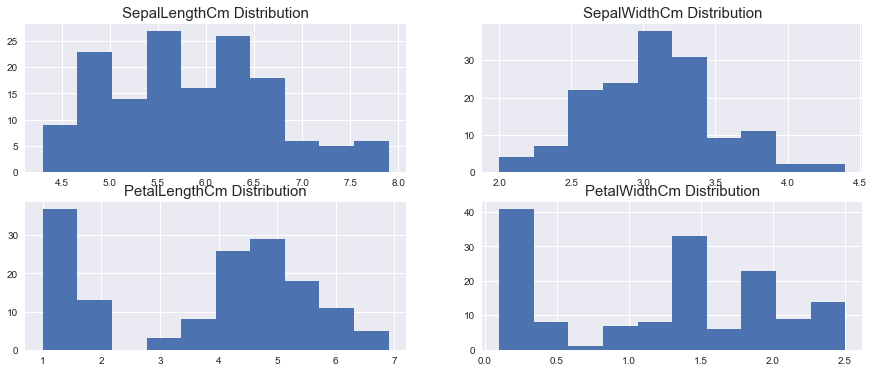

In [93]:
# Checking data distribution
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
                                    ncols=2,
                                    nrows=2,
                                    figsize=(15, 6))

ax1.hist(df["SepalLengthCm"])
ax1.set_title("SepalLengthCm Distribution", fontsize=15)

ax2.hist(df["SepalWidthCm"])
ax2.set_title("SepalWidthCm Distribution", fontsize=15)

ax3.hist(df["PetalLengthCm"])
ax3.set_title("PetalLengthCm Distribution", fontsize=15)

ax4.hist(df["PetalWidthCm"])
ax4.set_title("PetalWidthCm Distribution", fontsize=15)

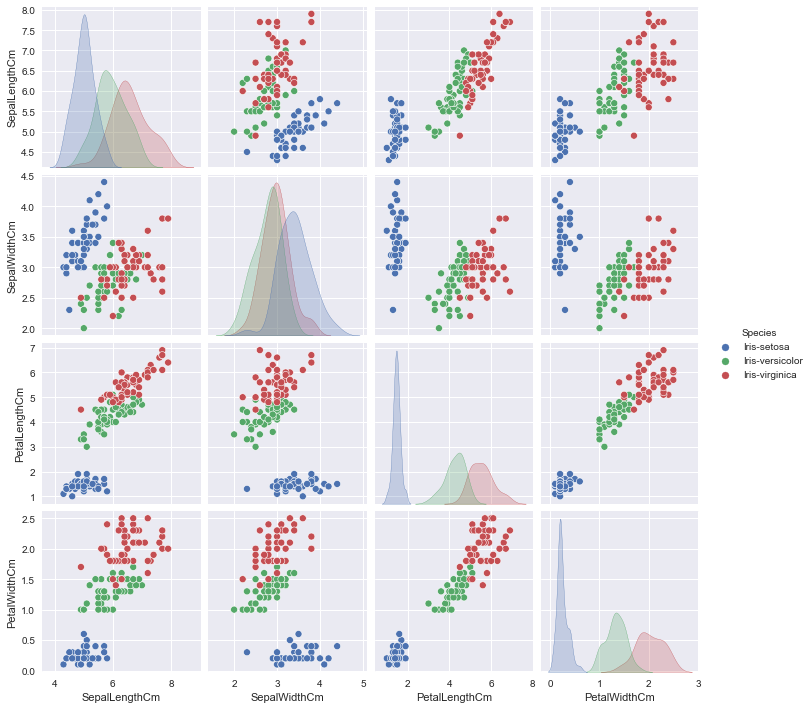

In [94]:
# Checking the correlation
sns.pairplot(df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm",
                 "PetalWidthCm", "Species"]], hue="Species")

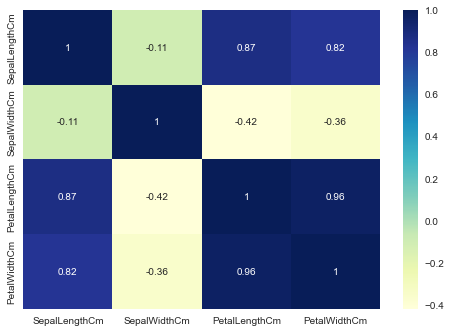

In [95]:
# Correlation heatmap
corr_df = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm",
              "PetalWidthCm"]].corr()
dataplot = sns.heatmap(corr_df, cmap="YlGnBu", annot=True)

Balanced dataset, no need to over/undersampling


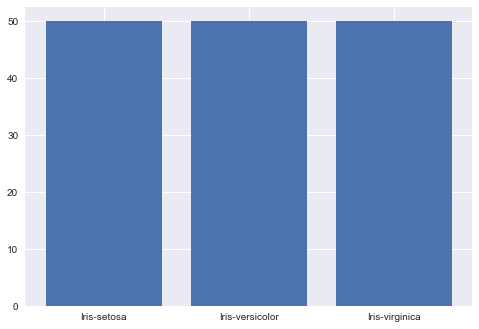

In [96]:
# Checking imbalance classes 
class_df = df.groupby(by=["Species"]).count().reset_index()
plt.bar(class_df["Species"], class_df["Id"])

print("Balanced dataset, no need to over/undersampling")

## Preprocessing

In [97]:
# Selecting the final features, labels
df = df.drop_duplicates()
df = df.drop(columns=["Id"])

features = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm"]]
labels = df["Species"]

In [99]:
# Getting features normal distribuated
quantile = QuantileTransformer(output_distribution='normal')
features=quantile.fit_transform(X=features)

C:\Users\2022\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


In [101]:
# Encoding
label_encoder = preprocessing.LabelEncoder()
labels = label_encoder.fit_transform(labels) 

In [169]:
# Train test split 
training_features, X_test , training_y, y_test = train_test_split(
    features, labels, test_size=.15, random_state=1, shuffle=True)

X_train, X_valid , y_train, y_valid = train_test_split(
    training_features, training_y, test_size=.2, random_state=1, shuffle=True)

In [170]:
print("The shape of X_train : ", X_train.shape)
print("The shape of X_valid : ", X_valid.shape)
print("The shape of X_test :  ", X_test.shape)

The shape of X_train :  (101, 3)
The shape of X_valid :  (26, 3)
The shape of X_test :   (23, 3)


# Building Model

In [171]:
# Hyperparameters Tuning
# Choosing these two models compaared to the others because the other models 
# needs categorical features to get best accuracy 
svc_model = SVC(C=1.5, kernel="rbf")
knn_model = KNeighborsClassifier(n_neighbors=6)

# Fitting the data
svc_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [174]:
# Getting the predictions labels of validation

svc_train_pred = svc_model.predict(X_train) 
knn_train_pred = knn_model.predict(X_train)
svc_valid_pred = svc_model.predict(X_valid)
knn_valid_pred = knn_model.predict(X_valid)

# Evalution to get the best model
print("The accuracy on training data")
print("svc training accuracy : ", accuracy_score(y_true=y_train,
                                                 y_pred=svc_train_pred))
print("knn training accuracy : ", accuracy_score(y_true=y_train,
                                                 y_pred=knn_train_pred))

print()
print("Cross validation")
print("Cross vaildation of svc", cross_val_score(svc_model, X_train, y_train, cv=6).mean())
print("Cross vaildation of knn", cross_val_score(knn_model, X_train, y_train, cv=6).mean())

The accuracy on training data
svc training accuracy :  0.9702970297029703
knn training accuracy :  0.9702970297029703

Cross validation
Cross vaildation of svc 0.9607843137254902
Cross vaildation of knn 0.9117647058823529


# Model Evaluation

Text(0.5, 1.0, 'confusion matrix of knn')

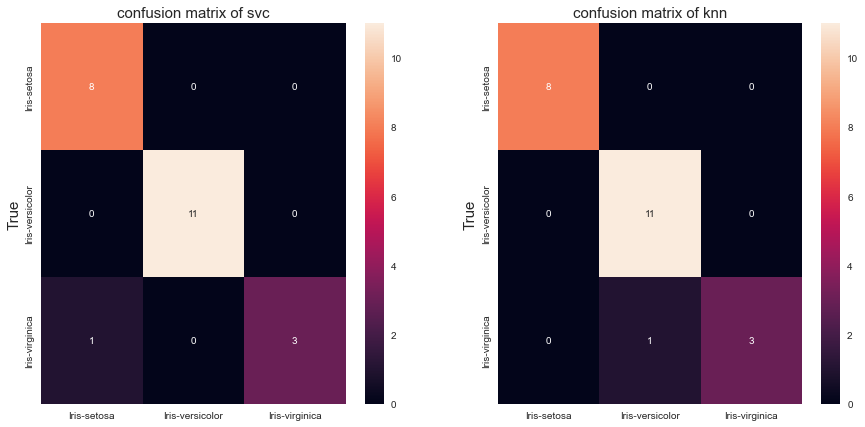

In [218]:
svc_test_pred = svc_model.predict(X_test)
knn_test_pred = knn_model.predict(X_test)

# Plotting svc confusion matrix
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
conf_mat = confusion_matrix(y_true=y_test, y_pred=svc_test_pred)
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
my_plot = sns.heatmap(conf_mat, annot=True, xticklabels=labels,
                      yticklabels=labels,)
my_plot.set_ylabel("Predicted", fontdict={"size":15})
my_plot.set_ylabel("True", fontdict={"size":15})
plt.title("confusion matrix of svc", fontdict={"size": 15})

# Plotting knn confusion matrix
plt.subplot(1,2,2)
conf_mat = confusion_matrix(y_true=y_test, y_pred=knn_test_pred)
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
my_plot = sns.heatmap(conf_mat, annot=True, xticklabels=labels,
                      yticklabels=labels,)
my_plot.set_ylabel("Predicted", fontdict={"size":15})
my_plot.set_ylabel("True", fontdict={"size":15})
plt.title("confusion matrix of knn", fontdict={"size": 15})

In [216]:
# Clasification Report 
print("Classification Report of SVC")
print(classification_report(y_true=y_test, y_pred=svc_test_pred))

Classification Report of SVC
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      1.00      1.00        11
           2       1.00      0.75      0.86         4

    accuracy                           0.96        23
   macro avg       0.96      0.92      0.93        23
weighted avg       0.96      0.96      0.95        23



In [217]:
print("Classification Report of knn")
print(classification_report(y_true=y_test, y_pred=knn_test_pred))

Classification Report of knn
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.92      1.00      0.96        11
           2       1.00      0.75      0.86         4

    accuracy                           0.96        23
   macro avg       0.97      0.92      0.94        23
weighted avg       0.96      0.96      0.95        23



### It appears from the results that SVC is a bit better than KNN

### Thank YOU
##### Group-3 USM ML Project